In [ ]:
#importing important libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#importing data
data = pd.read_csv('/content/drive/MyDrive/The spark foundation/globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")

In [ ]:
#top 5 rows of dataframe
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


# Data Cleaning

In [ ]:
#looking for null value in dataframe
pd.set_option('display.max_rows', None)
(data.isnull().sum()/len(data)*100).sort_values(ascending =False)

gsubname3             99.988992
weapsubtype4_txt      99.961473
weapsubtype4          99.961473
weaptype4             99.959822
weaptype4_txt         99.959822
claimmode3            99.926799
claimmode3_txt        99.926799
gsubname2             99.911938
claim3                99.824978
guncertain3           99.823877
gname3                99.821675
divert                99.821675
attacktype3           99.764435
attacktype3_txt       99.764435
ransomnote            99.717102
ransompaidus          99.696187
ransomamtus           99.690133
claimmode2            99.660963
claimmode2_txt        99.660963
ransompaid            99.574002
corp3                 99.435305
targsubtype3          99.396228
targsubtype3_txt      99.396228
natlty3_txt           99.368708
natlty3               99.368708
target3               99.353298
targtype3             99.352747
targtype3_txt         99.352747
ransomamt             99.256980
weapsubtype3_txt      99.068198
weapsubtype3          99.068198
weaptype

In [ ]:
#removing the columns have null value more than 30%
remove=(data.isnull().mean()*100).sort_values(ascending= False)[data.isnull().mean()*100>30].index.tolist()
data= data.drop(columns= remove)

In [ ]:
#dataframe size
data.shape

(181691, 48)

In [ ]:
(data.isnull().sum()/len(data)*100).sort_values(ascending =False)

corp1               23.418882
weapsubtype1        11.430396
weapsubtype1_txt    11.430396
nwound               8.977330
targsubtype1_txt     5.709144
targsubtype1         5.709144
nkill                5.676120
longitude            2.508104
latitude             2.507554
natlty1              0.858050
natlty1_txt          0.858050
target1              0.350045
city                 0.238867
provstate            0.231712
guncertain1          0.209146
ishostkid            0.097969
specificity          0.003302
doubtterr            0.000550
multiple             0.000550
INT_MISC             0.000000
INT_IDEO             0.000000
gname                0.000000
property             0.000000
individual           0.000000
weaptype1            0.000000
weaptype1_txt        0.000000
INT_LOG              0.000000
dbsource             0.000000
eventid              0.000000
targtype1            0.000000
targtype1_txt        0.000000
iyear                0.000000
imonth               0.000000
iday      

In [ ]:
#droping the column which will not help in analysis
data = data.drop(['targtype1','attacktype1','weaptype1','eventid','country','targsubtype1','weapsubtype1','natlty1','INT_ANY','INT_LOG','INT_IDEO','INT_MISC','dbsource','property','guncertain1','crit1','crit2','crit3'], axis=1)

In [ ]:
#removing rows with null values
data = data[~data['corp1'].isnull()]
data = data[~data['weapsubtype1_txt'].isnull()]
data = data[~data['nwound'].isnull()]
data = data[~data['targsubtype1_txt'].isnull()]
data = data[~data['nkill'].isnull()]
data = data[~data['longitude'].isnull()]
data = data[~data['natlty1_txt'].isnull()]
data = data[~data['provstate'].isnull()]
data = data[~data['target1'].isnull()]
data = data[~data['ishostkid'].isnull()]
data = data[~data['city'].isnull()]
data = data[~data['doubtterr'].isnull()]
data = data[~data['multiple'].isnull()]

In [ ]:
#final data
pd.set_option('display.max_columns', None)
data.head(10)

,iyear,imonth,iday,extended,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,individual,weaptype1_txt,weapsubtype1_txt,nkill,nwound,ishostkid
5,1970,1,1,0,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,0.0,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,United States,Black Nationalists,0,Firearms,Unknown Gun Type,0.0,0.0,0.0
6,1970,1,2,0,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,0.0,0.0,0,0,Assassination,Police,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,Uruguay,Tupamaros (Uruguay),0,Firearms,Automatic or Semi-Automatic Rifle,0.0,0.0,0.0
7,1970,1,2,0,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1.0,0.0,1,0,Bombing/Explosion,Utilities,Electricity,Pacific Gas & Electric Company,Edes Substation,United States,Unknown,0,Explosives,Unknown Explosive Type,0.0,0.0,0.0
8,1970,1,2,0,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,0.0,0.0,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",United States,New Year's Gang,0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0
9,1970,1,3,0,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0,0.0,0.0,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,United States,New Year's Gang,0,Incendiary,Gasoline or Alcohol,0.0,0.0,0.0
11,1970,1,6,0,United States,1,North America,Colorado,Denver,39.758968,-104.876305,1.0,0,1.0,0.0,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,Army Recruiting Station,"Army Recruiting Station, Denver Colorado",United States,Left-Wing Militants,0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0
12,1970,1,8,0,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1.0,0,-9.0,0.0,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Trans World Airline,Flight 802 Boeing 707,United States,Unknown,0,Firearms,Rifle/Shotgun (non-automatic),0.0,0.0,0.0
13,1970,1,9,0,United States,1,North America,Michigan,Detroit,42.331685,-83.047924,1.0,0,0.0,0.0,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,U.S. Government housing,Packard Properties building of Detroit Michigan,United States,Left-Wing Militants,0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0
14,1970,1,9,0,United States,1,North America,Puerto Rico,Rio Piedras,18.386932,-66.061127,1.0,0,1.0,0.0,1,0,Facility/Infrastructure Attack,Business,Retail/Grocery/Bakery,American owned business in Puerto Rico,Baker's Store,United States,Armed Commandos of Liberation,0,Incendiary,Arson/Fire,0.0,0.0,0.0
17,1970,1,12,0,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,0.0,0.0,1,0,Bombing/Explosion,Educational Institution,School/University/Educational Building,High School,James Madison High School,United States,Black Nationalists,0,Explosives,Pipe Bomb,0.0,0.0,0.0


In [ ]:
#dataframe size
data.shape

(106861, 30)

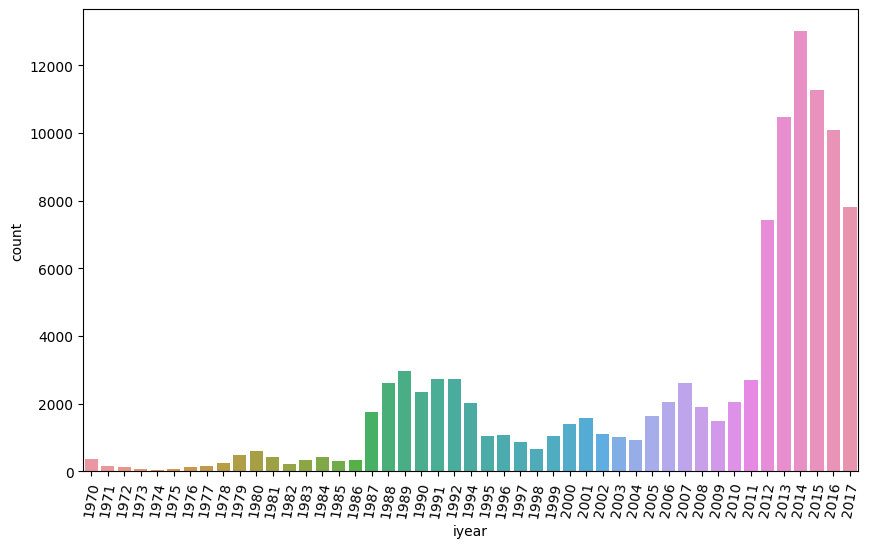

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(data, x='iyear')
plt.xticks(rotation=80)
plt.show()

#### 2013-2017 has highest number of attacks.

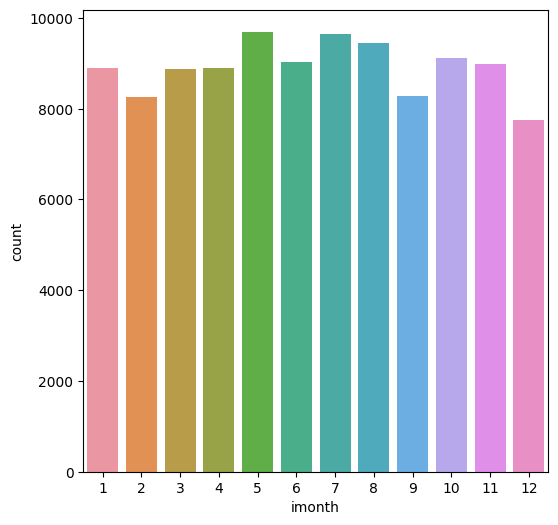

In [ ]:
plt.figure(figsize=[6,6])
sns.countplot(data, x='imonth')
plt.show()

### No pattern in months.

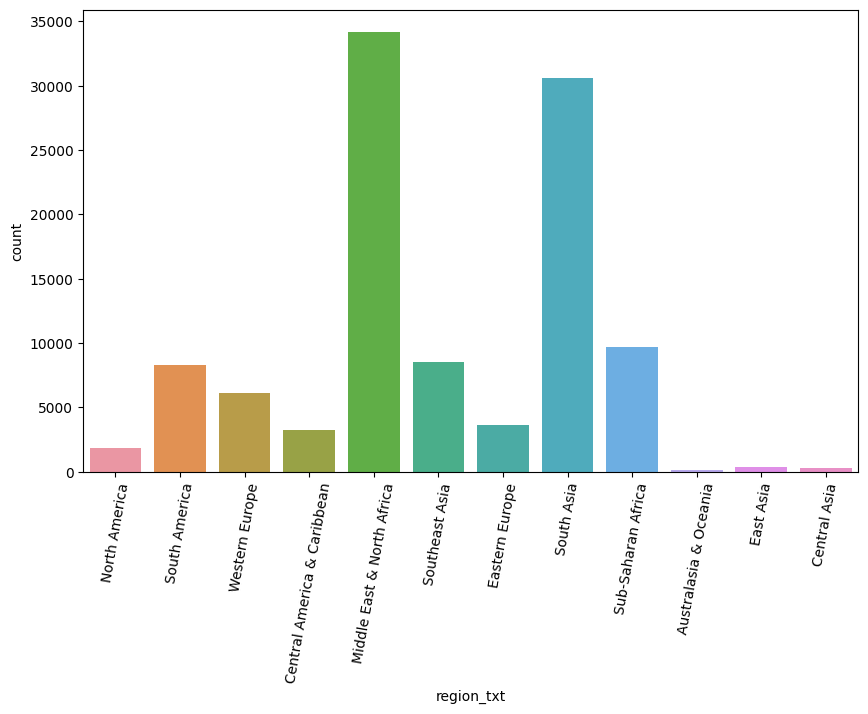

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(data, x='region_txt')
plt.xticks(rotation=80)
plt.show()

## Middle East & North Africa has highest attacks.

In [ ]:
#converting the dataframe for further analysis
pd.to_csv("global terrorism.csv")